# Deals with data exploration for STUDY2 data

In [1]:
%config IPCompleter.greedy=True

In [2]:
# %load UtilityFunctions.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def readDataFromCsv(file):
    print ("Reading the file from: ",file)
    df = pd.read_csv(file)
    return df

def transformData(df):
    print ("transforming the data and selecting few columns..")
    result = df[['id','timestamp','user_id','event','App','User', 'Cond', 'sessionNr', 'SessionType','button_pressed', 'correct_answer',
    'x_location','y_location','button_height', 'target_height', 'button_width', 'target_width', 'button_origin_x', 'target_origin_x', 
    'button_origin_y', 'target_origin_y', 'button_touch_x_location', 'target_touch_x_location', 
    'button_touch_y_location', 'target_touch_y_location', 'difference.touch_buttonCenter_x', 
    'difference.touch_buttonCenter_y', 'touchAccuracy_x', 'touchAccuracy_y', 'touchAccuracy', 
    'x_location.down', 'x_location.release', 'y_location.down', 'y_location.release', 'swipe_length.x', 
    'swipe_length.y', 'swipe_length', 'touch.duration', 'swipe_speed', 'swipe_speed.x', 
    'swipe_speed.y', 'time_between_touches']]
    print ("transformation completed!")
    return result

def getSubset(df):
    result = df[['user_id','App', 'Cond', 'sessionNr','x_location.down', 'y_location.down','x_location.release',
    'y_location.release','button_touch_x_location', 'target_touch_x_location', 
    'button_touch_y_location', 'target_touch_y_location',  'swipe_length','swipe_length.x', 
    'swipe_length.y',  'touch.duration', 'time_between_touches','swipe_speed', 'swipe_speed.x', 
    'swipe_speed.y', 'difference.touch_buttonCenter_x', 
    'difference.touch_buttonCenter_y', 'touchAccuracy_x', 'touchAccuracy_y', 'touchAccuracy', 
     ]]
    return result

def joinDataset(df1, df2, cond):
    df_result= pd.merge(df1, df2, on=cond)
    print("Join operation successful !")
    return df_result

def deleteColumns(df,columns):
    df.drop(columns, axis=1)
    


In [3]:
# %load EDA_operations.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#################################  Functions for EDA   ##########################################################################

def getInfo(df,name):
    print ("Shape of %s data: %s" %(name,df.shape))
    print("info of %s data" %name)
    print (df.info())
    
def generateHeatMap(df):
    corr_df= df.corr()
    # Determines the correlation between the variables.
    fig, ax =  plt.subplots(figsize=(25,25)) 
    sns.set()
    ax = sns.heatmap(df.corr(), annot=True, linewidths = 0.5, cmap='viridis')

def generateBoxplot(df,dims):
    l = df.columns.values
    number_of_columns=12
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,10,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],color='green',orient='v')
        plt.tight_layout()

def plotDistribution(df):
    import warnings
    warnings.filterwarnings('ignore')
    l = df.columns.values
    number_of_columns=12
    number_of_rows = len(l)-1/number_of_columns
    plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,4,i+1)
        sns.distplot(df[l[i]],kde=True) 

def computeStats(df):
    df_temp =df
    print(df_temp.columns)
    df1= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).mean()
    compute(df1,"mean")
    df2= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).median()
    compute(df2,"median")
    df3= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).skew()
    compute(df3,"skew")
    df4= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).apply(pd.DataFrame.kurt)
    compute(df4,"kurt")
    df5= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).quantile()
    compute(df5,"quantile")
    df6= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).std()
    compute(df6,"std")
    df7= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).mad()
    compute(df7,"mad")
    df8= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).max()
    compute(df8,"max")
    df9= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).min()
    compute(df9,"min")
    df10= df_temp.groupby(by=['sessionNr','App','Cond','user_id']).count()
    compute(df10,"count")
    
    result = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=1, sort=False)
    result.reset_index(inplace=True)
    result['user_id']=pd.to_numeric(result['user_id'])
    result['sessionNr']=pd.to_numeric(result['sessionNr'])
    return result


def compute(df,name):
    for col in df.columns:
        df.rename(index=str,columns={col:col+"_"+name},inplace=True)
    if 'user_id'+'_'+name in df.columns or 'sessionNr'+'_'+name in df.columns:
        df.drop('user_id'+'_'+name,axis=1,inplace=True)
        df.drop('sessionNr'+'_'+name,axis=1,inplace=True)


In [4]:
# load the dataset
df_study2 = readDataFromCsv("rawData.firstTry/04_DataExperiment_generalTouchFeatures_study2.csv")
df_uxratings_study2 = readDataFromCsv("rawData.firstTry/UXRatings_study2.csv")

Reading the file from:  rawData.firstTry/04_DataExperiment_generalTouchFeatures_study2.csv
Reading the file from:  rawData.firstTry/UXRatings_study2.csv


In [5]:
# check for the columns
df_uxratings_study2.columns

Index(['Unnamed: 0', 'UserId', 'Condition', 'VP', 'Session', 'PQ', 'ATT', 'HQI', 'HQS', 'HQ', 'PQ.levels', 'PQ.2levels', 'PQ.2levels.split.at.4', 'PQ.2BalancedClasses', 'HQ.levels', 'HQ.2levels', 'HQ.2levels.split.at.4', 'HQ.2BalancedClasses', 'ATT.levels', 'ATT.2levels', 'IconSize', 'Position', 'Handedness', 'HandUsed', 'DominantHand'], dtype='object')

In [6]:
# disiplay unique conditions in study2
df_study2.Condition.unique()
df_study2.Cond.unique()

array(['TinyIcons.Stand.RIGHT.Right', 'Normal.Table.RIGHT.Right',
       'Normal.Hand.RIGHT.Left', 'TinyIcons.Table.RIGHT.Left',
       'Normal.Hand.RIGHT.Right', 'TinyIcons.Hand.RIGHT.Right',
       'Normal.Stand.RIGHT.Left', 'TinyIcons.Table.RIGHT.Right',
       'Normal.Table.RIGHT.Left', 'TinyIcons.Stand.RIGHT.Left',
       'TinyIcons.Hand.RIGHT.Left', 'Normal.Stand.RIGHT.Right',
       'TinyIcons.Stand.LEFT.Left', 'Normal.Stand.LEFT.Right',
       'TinyIcons.Table.LEFT.Left', 'TinyIcons.Table.LEFT.Right',
       'Normal.Stand.LEFT.Left', 'TinyIcons.Hand.LEFT.Left',
       'Normal.Table.LEFT.Left', 'Normal.Table.LEFT.Right',
       'Normal.Hand.LEFT.Left', 'TinyIcons.Stand.LEFT.Right',
       'TinyIcons.Hand.LEFT.Right', 'Normal.Hand.LEFT.Right'],
      dtype=object)

In [7]:
print(df_uxratings_study2.Session.unique())
print(df_study2.sessionNr.unique())

[10  7 11  8  5  9  1  2  3  6 12  4]
[  1  10  11  12   2   3   4   5   6   7   8   9  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 100 101 102 103 104 105 106 107 108  97  98  99
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 

In [8]:
# select only a subset of columns
df_study2_subset = transformData(df_study2)

transforming the data and selecting few columns..
transformation completed!


In [9]:
print("size of the subset of data:",df_study2_subset.shape)

size of the subset of data: (99280, 42)


In [78]:
# consider only the touch events
df_study2_touches =df_study2_subset.loc[df_study2_subset['event'].isin(['touch.down','touch.release'])]
df_study2_touches.head()
print("size of the touch data:",df_study2_touches.shape)

size of the touch data: (50539, 42)


In [79]:
# check for null values
df_study2_touches.isnull().sum()

id                                     0
timestamp                              0
user_id                                0
event                                  0
App                                    0
User                                   0
Cond                                   0
sessionNr                              0
SessionType                            0
button_pressed                         0
correct_answer                         0
x_location                             0
y_location                             0
button_height                        134
target_height                      34363
button_width                         134
target_width                       34363
button_origin_x                    18109
target_origin_x                    34363
button_origin_y                    18109
target_origin_y                    34363
button_touch_x_location            18109
target_touch_x_location            34363
button_touch_y_location            18109
target_touch_y_l

In [80]:
# %load CleaningScripts/script_study2.py
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
def fillorDropMissingValues(df):
    print("contains null values?: ",df.isnull().values.any())
    df_temp=df.dropna(subset=['x_location.release','y_location.release'])
    #delete the infinites from the table
    df_withoutinf= df_temp[df_temp['swipe_speed']!= np.inf]
    df_withoutinf_withoutna = df_withoutinf
    df_withoutinf_withoutna['swipe_speed']= df_withoutinf.swipe_speed.fillna(0)
    df_withoutinf_withoutna['swipe_speed.x']= df_withoutinf['swipe_speed.x'].fillna(0)
    df_withoutinf_withoutna['swipe_speed.y']= df_withoutinf['swipe_speed.x'].fillna(0)
    df_temp=df_withoutinf_withoutna
    df_temp_1 = df_withoutinf_withoutna
    df_temp.dropna(subset=['target_height'],inplace=True)
    df_temp.dropna(subset=['time_between_touches'],inplace=True)
    df_temp.dropna(subset=['difference.touch_buttonCenter_x'],inplace=True)
    df_temp.dropna(subset=['difference.touch_buttonCenter_y'],inplace=True)
    df_temp.dropna(subset=['button_touch_x_location'],inplace=True)
    df_temp.dropna(subset=['button_touch_y_location'],inplace=True)
    df_withoutinf_withoutna = df_temp
    print(df_withoutinf_withoutna.shape)
    return df_withoutinf_withoutna

def DropMissingValues(df):
    df =df.replace(np.inf,np.nan)
    df =df.replace(-np.inf,np.nan)
    df_temp = df.dropna()
    return df_temp

In [81]:
df_study2_withoutinf_withoutna = DropMissingValues(df_study2_touches)
print('contains null value?:',df_study2_withoutinf_withoutna.isnull().values.any())
print(df_study2_withoutinf_withoutna.shape)

contains null value?: False
(9020, 42)


In [83]:
# Replace the Cond with Normal TinyIcons and Freezing only
def fillCond(ele):
    if 'TinyIcons' in ele:
        ele = 'TinyIcons'
    if 'Normal' in ele:
        ele = 'Normal'
    if 'Freezing' in ele:
        ele = 'Freezing'
    return ele
df_study2_withoutinf_withoutna['Cond']=df_study2_withoutinf_withoutna['Cond'].map(fillCond)
df_study2_withoutinf_withoutna.head()

,id,timestamp,user_id,event,App,User,Cond,sessionNr,SessionType,button_pressed,correct_answer,x_location,y_location,button_height,target_height,button_width,target_width,button_origin_x,target_origin_x,button_origin_y,target_origin_y,button_touch_x_location,target_touch_x_location,button_touch_y_location,target_touch_y_location,difference.touch_buttonCenter_x,difference.touch_buttonCenter_y,touchAccuracy_x,touchAccuracy_y,touchAccuracy,x_location.down,x_location.release,y_location.down,y_location.release,swipe_length.x,swipe_length.y,swipe_length,touch.duration,swipe_speed,swipe_speed.x,swipe_speed.y,time_between_touches
25,162475.0,2017-06-26 15:07:28,190,touch.down,Spell,190,TinyIcons,1,Spell.TinyIcons.Stand.RIGHT.Right.190,True,True,717.0,575.5,15.0,16.5,15.0,16.5,707.0,688.25,568.0,569.75,10.0,-0.681818,7.5,14.31818,2.5,0.0,0.333333,0.000000,0.000000,717.0,687.5,575.5,585.5,-29.5,10.0,31.148836,1.0,31.148836,-29.500,10.000000,1.0
29,162477.0,2017-06-26 15:07:30,190,touch.down,Spell,190,TinyIcons,1,Spell.TinyIcons.Stand.RIGHT.Right.190,True,True,696.5,578.5,15.0,16.5,15.0,16.5,689.0,261.25,570.5,708.75,7.5,-2.954545,8.0,13.86364,0.0,0.5,0.000000,0.066667,0.000000,696.5,258.0,578.5,724.0,-438.5,145.5,462.009199,2.0,231.004600,-219.250,72.750000,1.0
48,162513.0,2017-06-26 15:08:12,190,touch.down,Spell,190,TinyIcons,1,Spell.TinyIcons.Stand.RIGHT.Right.190,True,True,798.5,524.5,15.0,16.5,15.0,16.5,787.0,718.75,521.0,694.25,11.5,7.500000,3.5,16.13636,4.0,-4.0,0.533333,-0.533333,-0.284444,798.5,727.0,524.5,712.0,-71.5,187.5,200.670127,4.0,50.167532,-17.875,46.875000,-2.0
52,162515.0,2017-06-26 15:08:14,190,touch.down,Spell,190,TinyIcons,1,Spell.TinyIcons.Stand.RIGHT.Right.190,True,True,893.5,499.5,15.0,16.5,15.0,16.5,882.0,811.25,494.0,695.75,11.5,6.590909,5.5,15.22727,4.0,-2.0,0.533333,-0.266667,-0.142222,893.5,818.5,499.5,712.5,-75.0,213.0,225.818511,4.0,56.454628,-18.750,53.250000,-2.0
56,162517.0,2017-06-26 15:08:17,190,touch.down,Spell,190,TinyIcons,1,Spell.TinyIcons.Stand.RIGHT.Right.190,True,True,938.5,313.0,15.0,16.5,15.0,16.5,926.0,201.75,308.0,702.25,12.5,11.136360,5.0,11.59091,5.0,-2.5,0.666667,-0.333333,-0.222222,938.5,214.0,313.0,715.0,-724.5,402.0,828.555520,-21.0,-39.455025,34.500,-19.142857,-1.0


In [85]:
df_study2_withoutinf_withoutna.event.unique()

array(['touch.down'], dtype=object)

In [73]:
df_study2_withoutinf_withoutna = getSubset(df_study2_withoutinf_withoutna)
print(df_study2_withoutinf_withoutna.shape)
df_study2_withoutinf_withoutna.isnull().values.any()

(9020, 25)


False

In [74]:
df_study2_temp = df_study2_withoutinf_withoutna.drop([ 'App', 'Cond', 'sessionNr','user_id'],axis=1)

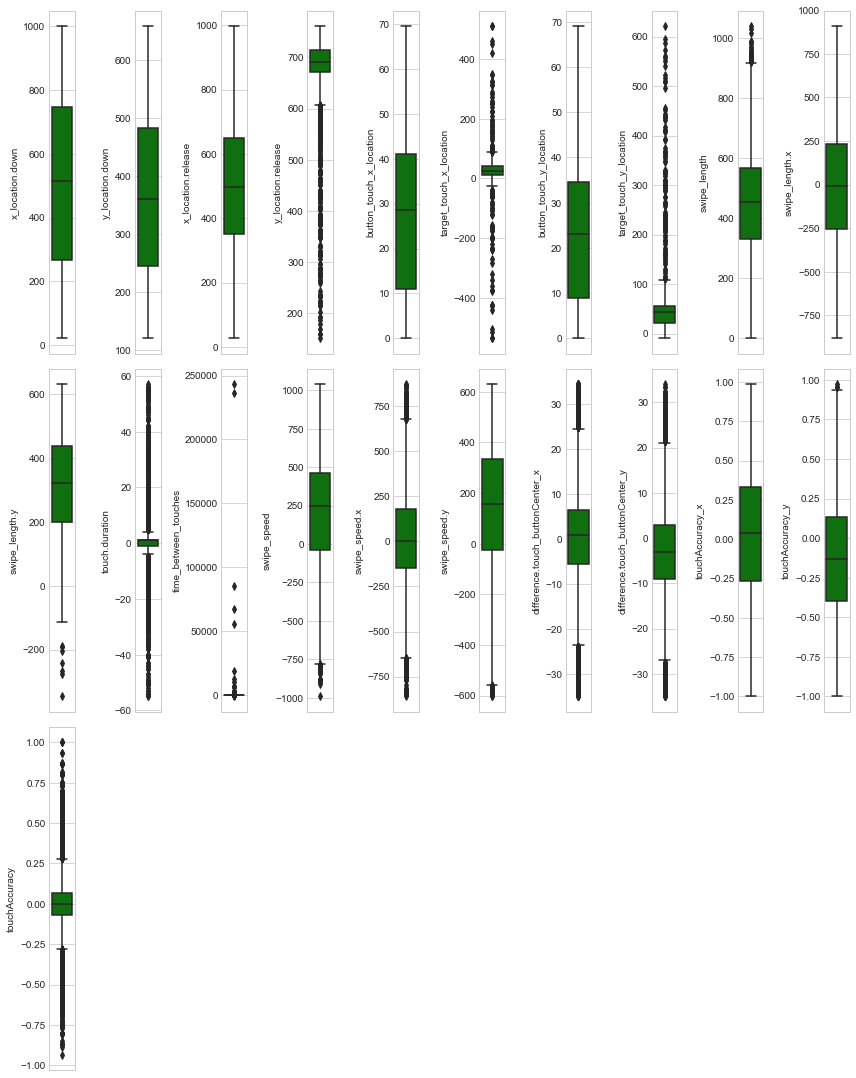

In [54]:
# check for outliers
generateBoxplot(df_study2_temp,None)

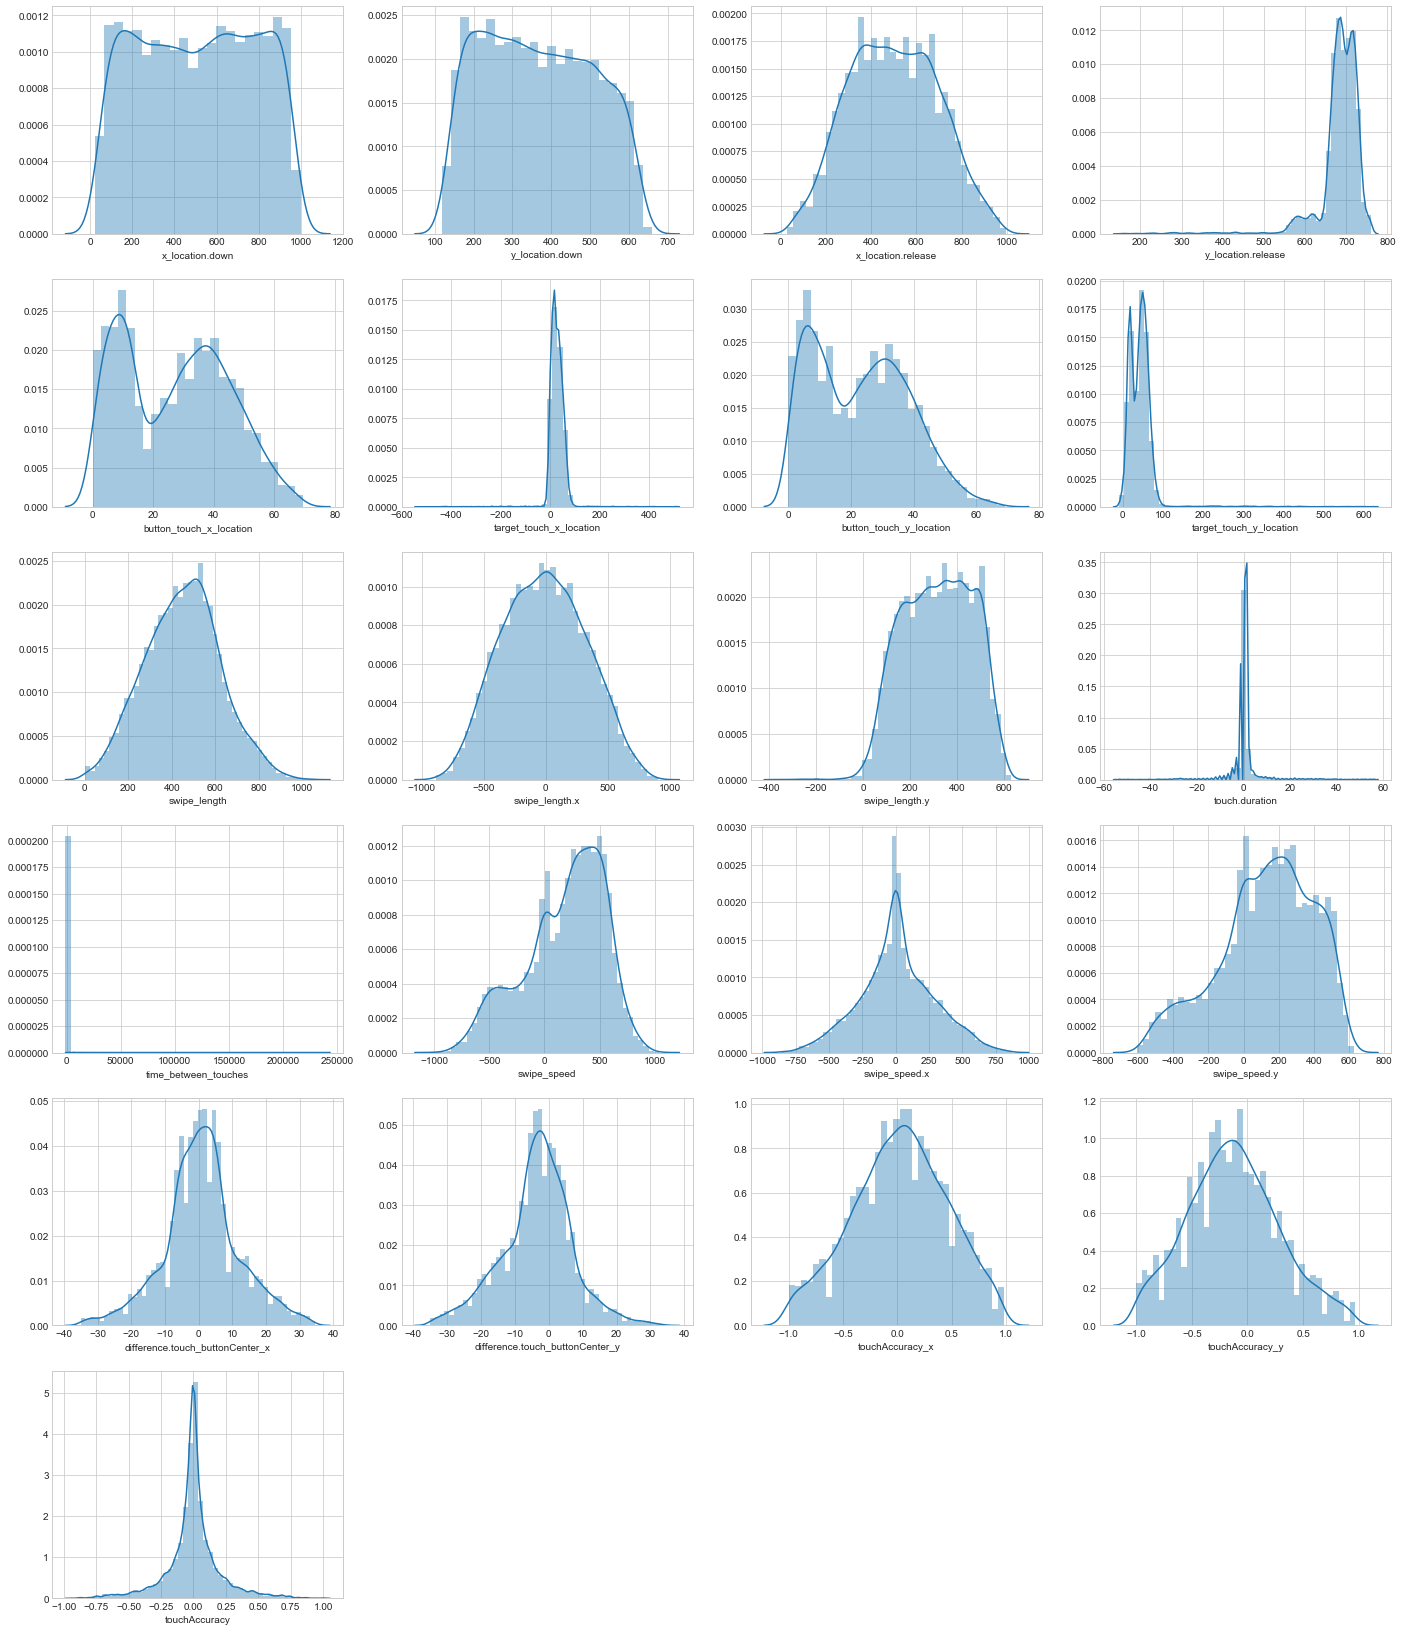

In [38]:
# visualize the distribution of the variables
plotDistribution(df_study2_temp)